In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import pandas as pd

from sklearn import preprocessing
import datetime
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

import numpy as np
import matplotlib.pyplot as plt

import missingno as msn

In [2]:
pd.options.mode.chained_assignment = None 

## Leamos los DF generados

Leemos los archivos por hora:

In [190]:
data_hora_00 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2000.csv')
data_hora_01 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2001.csv')
data_hora_02 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2002.csv')
data_hora_03 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2003.csv')
data_hora_04 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2004.csv')
data_hora_05 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2005.csv')
data_hora_06 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2006.csv')
data_hora_07 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2007.csv')
data_hora_08 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2008.csv')
data_hora_09 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2009.csv')
data_hora_10 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2010.csv')
data_hora_11 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2011.csv')
data_hora_12 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2012.csv')
data_hora_13 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2013.csv')
data_hora_14 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2014.csv')
data_hora_15 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2015.csv')
data_hora_16 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2016.csv')
data_hora_17 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2017.csv')
data_hora_18 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2018.csv')
data_hora_19 = pd.read_csv('/home/paw/DanielBustillos/por_hora/cont_hora2019.csv')

In [191]:
data_hora = data_hora_19.append(data_hora_18, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_17, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_16, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_15, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_14, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_13, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_12, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_11, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_10, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_09, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_08, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_07, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_06, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_05, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_04, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_03, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_02, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_01, ignore_index=True,sort=True)
data_hora = data_hora.append(data_hora_00, ignore_index=True,sort=True)

In [192]:
data_hora['dia'] = data_hora['fecha'].astype(str).str[8:10]
data_hora['mes'] =  data_hora['fecha'].astype(str).str[5:7]
data_hora['fecha'] = data_hora['fecha'].astype(str).str[0:10]

In [193]:
data_hora = data_hora.drop(["Unnamed: 0"],axis=1)
data_hora = data_hora.drop_duplicates()
data_hora = data_hora[1::]

In [194]:
data_hora = data_hora.drop(["PBa","PM2.5","PMCO","UVA","UVB"],axis=1)

In [195]:
data_hora = data_hora.dropna()

In [196]:
#data = data_hora.dropna(subset=['O3'])


# Datos por día: mean(), max(), min()

### Creamos un Df con los datos promedio por hora oara rellenar los nan del DF original

In [197]:
data_hora.head()

,CO,NO,NO2,NOX,O3,PM10,RH,SO2,TMP,WDR,WSP,dia,fecha,hora,id_station,mes
7,1.9,46.0,27.0,73.0,5.0,274.0,66.0,5.0,5.6,110.0,0.6,01,2019-01-01,4,CHO,01
8,0.7,7.0,29.0,36.0,19.0,192.0,52.0,8.0,9.5,221.0,1.3,01,2019-01-01,4,CUA,01
12,1.1,8.0,36.0,45.0,2.0,96.0,59.0,3.0,11.4,111.0,1.3,01,2019-01-01,4,HGM,01
17,1.3,43.0,36.0,80.0,1.0,118.0,69.0,5.0,11.0,130.0,0.8,01,2019-01-01,4,MER,01
18,1.9,56.0,36.0,92.0,2.0,143.0,63.0,3.0,11.8,170.0,0.7,01,2019-01-01,4,MGH,01


 Create a datetime column

In [198]:
data_hora['fecha']  = pd.to_datetime([''.join([' '.join([data_hora.loc[i, 'fecha'], str(data_hora.loc[i, 'hora'])]),':00']) for i in data_hora.index])

Sort into proper order so that rolling() is computed correctly


In [199]:
data_24 = data_hora.sort_values(['id_station','fecha'])
# Set the datetime column as the dataframe index
data_24 = data_24.set_index('fecha')

In [200]:
data_24 = data_24.groupby('id_station')["PM10"].rolling(24).mean().dropna().reset_index()

In [201]:
data_24 = data_24.rename(columns={'PM10': 'PM10_mean'})#, 'PM2.5': 'PM2.5_mean'})

## Groupbys

In [202]:
data_day = pd.merge(data_hora, data_24, on=["fecha","id_station"])

In [203]:
data_day = data_day[data_day.id_station!="PED"]
data_day = data_day[data_day.id_station!="PLA"]

### Definamos el Timeshift

## O3

In [1118]:
del data_hour_merge_24

In [1119]:
data_day.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'RH', 'SO2', 'TMP', 'WDR',
       'WSP', 'dia', 'fecha', 'hora', 'id_station', 'mes', 'PM10_mean'],
      dtype='object')

In [1120]:
data_hour_merge_24 = data_day[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'RH', 'SO2', 'TMP',
       'WSP', 'dia', 'fecha', 'hora', 'id_station', 'mes',"WDR"]].copy()
data_hour_merge_24 = data_hour_merge_24[data_hour_merge_24.fecha > "2015-01-01 23:00:00"]
data_hour_merge_24['dia'] = data_hour_merge_24['dia'].astype(str).astype(float)
data_hour_merge_24['mes'] = data_hour_merge_24['mes'].astype(str).astype(float)

In [1121]:
data_hour_merge_24["O3_1"] = data_hour_merge_24.O3.shift(-1)
data_hour_merge_24["O3_2"] = data_hour_merge_24.O3.shift(-2)
data_hour_merge_24["O3_3"] = data_hour_merge_24.O3.shift(-3)
data_hour_merge_24["O3_4"] = data_hour_merge_24.O3.shift(-4)
data_hour_merge_24["O3_24"] = data_hour_merge_24.O3.shift(-13)
data_hour_merge_24["O3_23"] = data_hour_merge_24.O3.shift(-12)
data_hour_merge_24["O3_22"] = data_hour_merge_24.O3.shift(-11)
data_hour_merge_24["O3_23"] = data_hour_merge_24.O3.shift(-12)
data_hour_merge_24["O3_59"] = data_hour_merge_24.O3.shift(-48)
data_hour_merge_24["O3_35"] = data_hour_merge_24.O3.shift(-24)

data_hour_merge_24["CO_30"] = data_hour_merge_24.CO.shift(-19)
data_hour_merge_24["CO_54"] = data_hour_merge_24.CO.shift(-43)
data_hour_merge_24["CO_54"] = data_hour_merge_24.CO.shift(-43)
data_hour_merge_24["CO_1"] = data_hour_merge_24.CO.shift(-1)
data_hour_merge_24["CO_2"] = data_hour_merge_24.CO.shift(-2)
data_hour_merge_24["CO_3"] = data_hour_merge_24.CO.shift(-3)

data_hour_merge_24["NO2_30"] = data_hour_merge_24.NO2.shift(-19)
data_hour_merge_24["NO2_54"] = data_hour_merge_24.NO2.shift(-43)
data_hour_merge_24["NO2_23"] = data_hour_merge_24.NO2.shift(-12)
data_hour_merge_24["NO2_1"] = data_hour_merge_24.NO2.shift(-1)
data_hour_merge_24["NO2_2"] = data_hour_merge_24.NO2.shift(-2)
data_hour_merge_24["NO2_3"] = data_hour_merge_24.NO2.shift(-3)

data_hour_merge_24["SO2_30"] = data_hour_merge_24.SO2.shift(-19)
data_hour_merge_24["SO2_1"] = data_hour_merge_24.SO2.shift(-1)
data_hour_merge_24["SO2_2"] = data_hour_merge_24.SO2.shift(-2)
data_hour_merge_24["SO2_3"] = data_hour_merge_24.SO2.shift(-3)

#data_hour_merge_24["RH_58"] = data_hour_merge_24.RH.shift(-58)
data_hour_merge_24["RH_34"] = data_hour_merge_24.RH.shift(-23)
data_hour_merge_24["RH_24"] = data_hour_merge_24.RH.shift(-13)
data_hour_merge_24["RH_23"] = data_hour_merge_24.RH.shift(-12)
data_hour_merge_24["RH_47"] = data_hour_merge_24.RH.shift(-36)
data_hour_merge_24["RH_1"] = data_hour_merge_24.RH.shift(-1)
data_hour_merge_24["RH_2"] = data_hour_merge_24.RH.shift(-2)
data_hour_merge_24["RH_3"] = data_hour_merge_24.RH.shift(-3)

data_hour_merge_24["TMP_24"] = data_hour_merge_24.TMP.shift(-13)
data_hour_merge_24["TMP_23"] = data_hour_merge_24.TMP.shift(-12)
data_hour_merge_24["TMP_47"] = data_hour_merge_24.TMP.shift(-36)
data_hour_merge_24["TMP_58"] = data_hour_merge_24.TMP.shift(-47)
data_hour_merge_24["TMP_34"] = data_hour_merge_24.TMP.shift(-23)
data_hour_merge_24["TMP_1"] = data_hour_merge_24.TMP.shift(-1)
data_hour_merge_24["TMP_2"] = data_hour_merge_24.TMP.shift(-2)
data_hour_merge_24["TMP_3"] = data_hour_merge_24.TMP.shift(-3)

data_hour_merge_24["PM10_29"] = data_hour_merge_24.PM10.shift(-18)
data_hour_merge_24["PM10_28"] = data_hour_merge_24.PM10.shift(-17)
data_hour_merge_24["PM10_52"] = data_hour_merge_24.PM10.shift(-41)
data_hour_merge_24["PM10_61"] = data_hour_merge_24.PM10.shift(-50)
data_hour_merge_24["PM10_1"] = data_hour_merge_24.PM10.shift(-1)
data_hour_merge_24["PM10_2"] = data_hour_merge_24.PM10.shift(-2)
data_hour_merge_24["PM10_3"] = data_hour_merge_24.PM10.shift(-3)
data_hour_merge_24["PM10_max_1"] = data_hour_merge_24.O3.shift(-1)
data_hour_merge_24["PM1_max_2"] = data_hour_merge_24.O3.shift(-2)
data_hour_merge_24["PM10_max_3"] = data_hour_merge_24.O3.shift(-3)

data_hour_merge_24["PM1_min_1"] = data_hour_merge_24.O3.shift(-12)
data_hour_merge_24["PM1_min_2"] = data_hour_merge_24.O3.shift(-24)

data_hour_merge_24["PM10_1"] = data_hour_merge_24.TMP.shift(-12)
data_hour_merge_24["PMPM10_2"] = data_hour_merge_24.TMP.shift(-24)

data_hour_merge_24["PM1_1"] = data_hour_merge_24.TMP.shift(-12)
data_hour_merge_24["PM1_2"] = data_hour_merge_24.TMP.shift(-24)

data_hour_merge_24["NO2_12"] = data_hour_merge_24.NO2.shift(-12)
data_hour_merge_24["NO2_24"] = data_hour_merge_24.NO2.shift(-24)
data_hour_merge_24["NO2_1"] = data_hour_merge_24.NO2.shift(-1)
data_hour_merge_24["NO2_2"] = data_hour_merge_24.NO2.shift(-2)

data_hour_merge_24["SO2_12"] = data_hour_merge_24.SO2.shift(-12)
data_hour_merge_24["SO2_24"] = data_hour_merge_24.SO2.shift(-24)
data_hour_merge_24["SO2_1"] = data_hour_merge_24.SO2.shift(-1)
data_hour_merge_24["SO2_2"] = data_hour_merge_24.SO2.shift(-2)

data_hour_merge_24["PM10_1_a"] = data_hour_merge_24.PM10.shift(-1)
data_hour_merge_24["PM10_2_a"] = data_hour_merge_24.PM10.shift(-24)
data_hour_merge_24["PM10_3_a"] = data_hour_merge_24.PM10.shift(-3)
data_hour_merge_24["PM10_4_a"] = data_hour_merge_24.PM10.shift(-5)

#data_hour_merge_24["PM10_2_y"] = data_hour_merge_24.O3.shift(-2)
#data_hour_merge_24["PM10_3_y"] = data_hour_merge_24.O3.shift(-24)
#data_hour_merge_24["PM10_4_y"] = data_hour_merge_24.O3.shift(-5)

data_hour_merge_24["PM10_1_x1"] = data_hour_merge_24.CO.shift(-1)
data_hour_merge_24["PM10_2_x1"] = data_hour_merge_24.CO.shift(-2)
data_hour_merge_24["PM10_3_x1"] = data_hour_merge_24.CO.shift(-24)
data_hour_merge_24["PM10_3_x1"] = data_hour_merge_24.CO.shift(-10)
data_hour_merge_24["PM10_4_x1"] = data_hour_merge_24.CO.shift(-4)

data_hour_merge_24["temp_1"] = data_hour_merge_24.TMP.shift(-1)
data_hour_merge_24["temp_24"] = data_hour_merge_24.TMP.shift(-24)
#data_hour_merge_24["pre_24"] = data_hour_merge_24.PA.shift(-1)
data_hour_merge_24["RH_24"] = data_hour_merge_24.RH.shift(-1)
data_hour_merge_24["RH_24_2"] = data_hour_merge_24.RH.shift(-12)

data_hour_merge_24["RH_24"] = data_hour_merge_24.RH.shift(-24)
data_hour_merge_24["RH_24_2"] = data_hour_merge_24.RH.shift(-11)

data_hour_merge_24["WSP13"] = data_hour_merge_24.WSP.shift(-24)
data_hour_merge_24["WSP12"] = data_hour_merge_24.WSP.shift(-12)
data_hour_merge_24["WSP11"] = data_hour_merge_24.WSP.shift(-11)
data_hour_merge_24["WSP10"] = data_hour_merge_24.WSP.shift(-10)
data_hour_merge_24["WSP9"] = data_hour_merge_24.WSP.shift(-9)
data_hour_merge_24["WSP8"] = data_hour_merge_24.WSP.shift(-8)
data_hour_merge_24["WSP7"] = data_hour_merge_24.WSP.shift(-7)
data_hour_merge_24["WSP6"] = data_hour_merge_24.WSP.shift(-6)
data_hour_merge_24["WSP5"] = data_hour_merge_24.WSP.shift(-5)
data_hour_merge_24["WSP4"] = data_hour_merge_24.WSP.shift(-4)
data_hour_merge_24["WSP3"] = data_hour_merge_24.WSP.shift(-3)
data_hour_merge_24["WSP2"] = data_hour_merge_24.WSP.shift(-2)
data_hour_merge_24["WSP1"] = data_hour_merge_24.WSP.shift(-1)

#data_hour_merge_24["UVB_x_1"] = data_hour_merge_24.UVB.shift(-1)
#data_hour_merge_24["UVB_x_2"] = data_hour_merge_24.PA.shift(-12)
#data_hour_merge_24["UVB_y_1"] = data_hour_merge_24.UVB.shift(-1)
#data_hour_merge_24["UVB_y_2"] = data_hour_merge_24.PA.shift(-24)

In [1122]:
data_hour_merge_24 = data_hour_merge_24.dropna(how='any').copy()

Facores Principales

In [1123]:
test = data_hour_merge_24[data_hour_merge_24.hora == 15]

In [1124]:
corr = test.corr()

In [1125]:
list_corrs = corr["O3"][(corr["O3"]> 0.11) | (corr["O3"]<-0.11)].index.tolist()

In [1126]:
list_corrs.append("fecha")
list_corrs.append("hora")

In [1127]:
data_hour_corr = data_hour_merge_24[list_corrs]

In [1128]:
list_corrs.remove("fecha")

## Groupbys

In [1129]:
cols = data_hour_merge_24.columns

In [1130]:
data_hour_merge_24_mean = data_hour_corr.groupby(['fecha'])[list_corrs].mean()
data_hour_merge_24_mean.reset_index(inplace=True)

In [1131]:
data_hour_merge_24_max = data_hour_merge_24.groupby(['fecha'])[list_corrs].max()
data_hour_merge_24_max.reset_index(inplace=True)

In [1132]:
data_hour_merge_24_min = data_hour_merge_24.groupby(['fecha'])[list_corrs].min()
data_hour_merge_24_min.reset_index(inplace=True)

### Factores Principales

In [1358]:
del data_hour_merge

In [1359]:
data_hour_merge = pd.merge(data_hour_merge_24_mean, data_hour_merge_24_max, on=["fecha"])
data_hour_merge = pd.merge(data_hour_merge, data_hour_merge_24_min, on=["fecha"])

In [1360]:
data_hour_merge["O3forecast_13"] = data_hour_merge.O3_y.shift(24)

In [1361]:
data_hour_merge["TMPforecast_13"] = data_hour_merge.TMP.shift(24)
data_hour_merge["TMPforecast_12"] = data_hour_merge.TMP.shift(12)
data_hour_merge["TMPforecast_11"] = data_hour_merge.TMP.shift(11)
data_hour_merge["TMPforecast_10"] = data_hour_merge.TMP.shift(10)
data_hour_merge["TMPforecast_9"] = data_hour_merge.TMP.shift(9)
data_hour_merge["TMPforecast_8"] = data_hour_merge.TMP.shift(8)
data_hour_merge["TMPforecast_7"] = data_hour_merge.TMP.shift(7)
data_hour_merge["TMPforecast_6"] = data_hour_merge.TMP.shift(6)
data_hour_merge["TMPforecast_5"] = data_hour_merge.TMP.shift(5)
data_hour_merge["TMPforecast_4"] = data_hour_merge.TMP.shift(4)
data_hour_merge["TMPforecast_3"] = data_hour_merge.TMP.shift(3)
data_hour_merge["TMPforecast_2"] = data_hour_merge.TMP.shift(2)
data_hour_merge["TMPforecast_1"] = data_hour_merge.TMP.shift(1)

data_hour_merge["WSPforecast_13"] = data_hour_merge.WSP.shift(24)
data_hour_merge["WSPforecast_12"] = data_hour_merge.WSP.shift(12)
data_hour_merge["WSPforecast_11"] = data_hour_merge.WSP.shift(11)
data_hour_merge["WSPforecast_10"] = data_hour_merge.WSP.shift(10)
data_hour_merge["WSPforecast_9"] = data_hour_merge.WSP.shift(9)
data_hour_merge["WSPforecast_8"] = data_hour_merge.WSP.shift(8)
data_hour_merge["WSPforecast_7"] = data_hour_merge.WSP.shift(7)
data_hour_merge["WSPforecast_6"] = data_hour_merge.WSP.shift(6)
data_hour_merge["WSPforecast_5"] = data_hour_merge.WSP.shift(5)
data_hour_merge["WSPforecast_4"] = data_hour_merge.WSP.shift(4)
data_hour_merge["WSPforecast_3"] = data_hour_merge.WSP.shift(3)
data_hour_merge["WSPforecast_2"] = data_hour_merge.WSP.shift(2)
data_hour_merge["WSPforecast_1"] = data_hour_merge.WSP.shift(1)

data_hour_merge["RHforecast_13"] = data_hour_merge.RH.shift(24)
data_hour_merge["RHforecast_12"] = data_hour_merge.RH.shift(12)
data_hour_merge["RHforecast_11"] = data_hour_merge.RH.shift(11)
data_hour_merge["RHforecast_10"] = data_hour_merge.RH.shift(10)
data_hour_merge["RHforecast_9"] = data_hour_merge.RH.shift(9)
data_hour_merge["RHforecast_8"] = data_hour_merge.RH.shift(8)
data_hour_merge["RHforecast_7"] = data_hour_merge.RH.shift(7)
data_hour_merge["RHforecast_6"] = data_hour_merge.RH.shift(6)
data_hour_merge["RHforecast_5"] = data_hour_merge.RH.shift(5)
data_hour_merge["RHforecast_4"] = data_hour_merge.RH.shift(4)
data_hour_merge["RHforecast_3"] = data_hour_merge.RH.shift(3)
data_hour_merge["RHforecast_2"] = data_hour_merge.RH.shift(2)
data_hour_merge["RHforecast_1"] = data_hour_merge.RH.shift(1)

In [1362]:
lista = ["O3forecast_13",'O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']

In [1363]:
corr_1 = data_hour_merge.corr()

In [1364]:
list_corrs = corr_1["O3forecast_13"][(corr_1["O3forecast_13"]> 0.1) | (corr_1["O3forecast_13"]<-0.1)].index.tolist()

In [1365]:
list_corrs.append("hora")

In [1366]:
data_hour_merge["O3forecast_12"] = data_hour_merge.O3_y.shift(12)
data_hour_merge["O3forecast_11"] = data_hour_merge.O3_y.shift(11)
data_hour_merge["O3forecast_10"] = data_hour_merge.O3_y.shift(10)
data_hour_merge["O3forecast_9"] = data_hour_merge.O3_y.shift(9)
data_hour_merge["O3forecast_8"] = data_hour_merge.O3_y.shift(8)
data_hour_merge["O3forecast_7"] = data_hour_merge.O3_y.shift(7)
data_hour_merge["O3forecast_6"] = data_hour_merge.O3_y.shift(6)
data_hour_merge["O3forecast_5"] = data_hour_merge.O3_y.shift(5)
data_hour_merge["O3forecast_4"] = data_hour_merge.O3_y.shift(4)
data_hour_merge["O3forecast_3"] = data_hour_merge.O3_y.shift(3)
data_hour_merge["O3forecast_2"] = data_hour_merge.O3_y.shift(2)
data_hour_merge["O3forecast_1"] = data_hour_merge.O3_y.shift(1)

In [1367]:
data_hour_merge = data_hour_merge[list(set(list_corrs+lista))]

In [1368]:
data_hour_merge = data_hour_merge.copy()

In [1369]:
data_hour_merge = data_hour_merge.dropna(how='any')

In [1370]:
#data_hour_merge.drop(["fecha"],axis=1,inplace=True)

In [1371]:
data_hour_merge = data_hour_merge[(data_hour_merge.hora==15)|(data_hour_merge.hora==16)|(data_hour_merge.hora==17)|(data_hour_merge.hora==18)|
                                  (data_hour_merge.hora==19)|(data_hour_merge.hora==20)|(data_hour_merge.hora==14)]

In [1372]:
data_hour_merge.shape

(10842, 231)

# Regresiónes

### Normalizamos el DS

In [1373]:
lista = lista[::-1]

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [1374]:
hora = 1

In [1375]:
dataset= data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [1376]:
X = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y = dataset[str('O3forecast_'+str(hora))]

In [1377]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)
#X =  pd.DataFrame(scaler1.fit_transform(X),columns=X.columns)
#y =  pd.DataFrame(scaler2.fit_transform(pd.DataFrame(y)),columns=['O3_+11_y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Neural Network Regression

In [1378]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create MLPRegressor object

mlp = MLPRegressor()#max_iter=1000,alpha=0.001, epsilon=.01 ,tol=.00001,learning_rate_init=.03)

In [1379]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [1380]:
nnr_pred = mlp.predict(X_test)

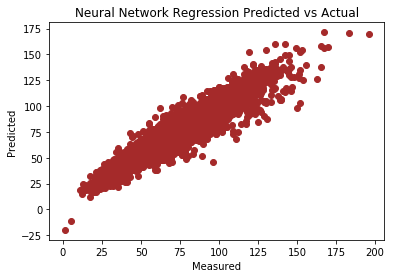

In [1381]:
plt.scatter(y_test, nnr_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [1382]:
xgb_score = mlp.score(X_test, y_test)
xgb_score

0.8851702400969581

In [1313]:
from joblib import dump, load

In [1314]:
dump(mlp,str( '/home/paw/DanielBustillos/Modelos/ANN_'+str(hora)+'.joblib'))

['/home/paw/DanielBustillos/Modelos/ANN_1.joblib']

In [1315]:
clf_7

NameError: name 'clf_7' is not defined

In [1022]:
clf_12 = load('/home/paw/DanielBustillos/Modelos/ANN_12.joblib') 
clf_11 = load('/home/paw/DanielBustillos/Modelos/ANN_11.joblib') 
clf_10 = load('/home/paw/DanielBustillos/Modelos/ANN_10.joblib') 
clf_9 = load('/home/paw/DanielBustillos/Modelos/ANN_9.joblib') 
clf_8 = load('/home/paw/DanielBustillos/Modelos/ANN_8.joblib') 
clf_7 = load('/home/paw/DanielBustillos/Modelos/ANN_7.joblib') 
clf_6 = load('/home/paw/DanielBustillos/Modelos/ANN_6.joblib') 
clf_5 = load('/home/paw/DanielBustillos/Modelos/ANN_5.joblib') 
clf_4 = load('/home/paw/DanielBustillos/Modelos/ANN_4.joblib') 
clf_3 = load('/home/paw/DanielBustillos/Modelos/ANN_3.joblib') 
clf_2 = load('/home/paw/DanielBustillos/Modelos/ANN_2.joblib') 
clf_1 = load('/home/paw/DanielBustillos/Modelos/ANN_1.joblib') 

In [528]:
X_test =X_test.iloc[10:20,:]

In [530]:
pred_1 = clf_1.predict(X_test.head(1))
pred_2 = clf_2.predict(X_test.head(1))
pred_3 = clf_3.predict(X_test.head(1))
pred_4 = clf_4.predict(X_test.head(1))
pred_5 = clf_5.predict(X_test.head(1))
pred_6 = clf_6.predict(X_test.head(1))
pred_7 = clf_7.predict(X_test.head(1))
pred_8 = clf_8.predict(X_test.head(1))
pred_9 = clf_9.predict(X_test.head(1))
pred_10 = clf_10.predict(X_test.head(1))
pred_11 = clf_11.predict(X_test.head(1))
pred_12 = clf_12.predict(X_test.head(1))

In [531]:
pred =  pd.DataFrame(columns=["pred_1"])

In [532]:
    df_pred =  pd.DataFrame(columns=["pred_1"])
    df_pred["pred_1"] = pred_1
    df_pred["pred_2"] = pred_2
    df_pred["pred_3"] = pred_3
    df_pred["pred_4"] = pred_4
    df_pred["pred_5"] = pred_5
    df_pred["pred_6"] = pred_6
    df_pred["pred_7"] = pred_7
    df_pred["pred_8"] = pred_8
    df_pred["pred_9"] = pred_9
    df_pred["pred_10"] = pred_10
    df_pred["pred_11"] = pred_11
    df_pred["pred_12"] = pred_12

In [533]:
df_pred

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12
0,54.957937,51.781566,57.165241,74.372459,90.542445,98.629053,89.717011,86.063499,71.769331,43.592133,30.518401,26.412203


## Linear

In [1383]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression(fit_intercept=False, n_jobs=3)

In [1384]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=3, normalize=False)

In [1385]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

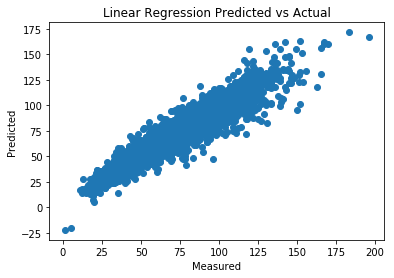

In [1386]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [1387]:
regr.score(X_test, y_test)

0.8876309884677099

In [360]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)

In [1676]:
coefficients["values"] = coefficients.iloc[:,1]

# XGBoost

In [1388]:
from xgboost.sklearn import XGBRegressor

In [1389]:
xboost = XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = .2,
                      min_child_weight =1,
                      n_estimators=1300, #2000
                      reg_alpha = 1,
                      max_depth=2, 
                      gamma=0.1,njobs=64)#n_estimators=100, max_depth=20,learning_rate =.1,base_score=0.000003)

In [1390]:
xboost = XGBRegressor( learning_rate=0.2,loss="deviance",n_estimators=1000,n_jobs=64)

In [1391]:
xboost.fit(X_train, y_train)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.2, loss='deviance', max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [1392]:
xgb_score = xboost.score(X_test, y_test)

In [1393]:
#Predict 
xboost_pred = xboost.predict(X_test)

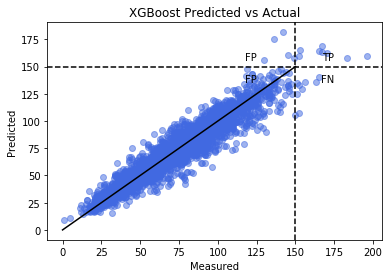

In [1409]:
plt.scatter(y_test, xboost_pred,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

In [1410]:
xboost.score(X_test, y_test)

0.9009499615570937

# ada

In [1396]:
regr_x = AdaBoostRegressor( XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = .2,
                      min_child_weight =1,
                      n_estimators=1300, #2000
                      reg_alpha = 1,
                      max_depth=2, 
                      gamma=0.1),learning_rate=0.1)
regr_x.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_1 = regr_x.predict(X_test)

In [ ]:
plt.scatter(y_test, y_1)
plt.tight_layout(1.3)
plt.xlabel(' PM10 promedio Medido')
plt.ylabel(' PM10 promedio Pronosticado')
plt.title('Pronóstico de PM10 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temrp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=900)
plt.show()

In [ ]:
regr_x.score(X_test, y_test)

## ADA Booster applied on Decision Tree Regressor

In [1230]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=10,learning_rate=0.01)
#regr_2 = AdaBoostRegressor(DecisionTreeRegressor(),)


In [1231]:
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.01, loss='linear', n_estimators=10,
         random_state=None)

In [1232]:
y_2 = regr_2.predict(X_test)

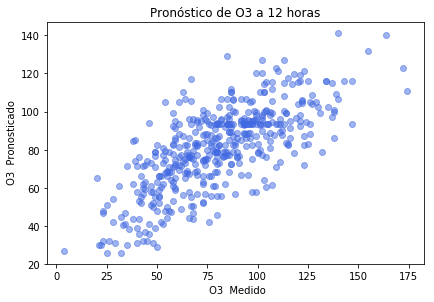

In [1233]:
#y_2 = pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(y_2)),columns=["O3_11_forecast"]);
#y_test_1 = pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(y_test)),columns=["O3_11_forecast"]);

plt.scatter(y_test,y_2,alpha=0.5,color="royalblue")
plt.tight_layout(1.3)
plt.xlabel(' O3  Medido')
plt.ylabel(' O3  Pronosticado')
plt.title('Pronóstico de O3 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=600)
plt.show()

In [1234]:
regr_2.score(X_test, y_test)

0.5211268589737014

## ADA Booster applied on Random Tree Regressor

In [1397]:
y_train.quantile(0.99)

143.0

In [1398]:
from sklearn.ensemble import GradientBoostingRegressor 

In [1428]:
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.0455,loss="quantile",alpha=0.887,verbose=1,random_state=123)#,n_estimators=1000)

In [1429]:
regr_fit = gbr.fit(X_train, y_train)
y_1 = gbr.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           5.4525           37.48s
         2           5.2817           36.88s
         3           5.1210           36.90s
         4           4.9730           36.83s
         5           4.8416           36.60s
         6           4.7149           36.40s
         7           4.5870           36.21s
         8           4.4625           36.34s
         9           4.3487           36.19s
        10           4.2381           36.37s
        20           3.4589           36.81s
        30           3.0078           35.09s
        40           2.6809           34.07s
        50           2.4596           34.52s
        60           2.2993           34.22s
        70           2.1656           33.83s
        80           2.0658           33.19s
        90           1.9859           32.78s
       100           1.9267           31.75s
       200           1.6968           22.49s
       300           1.6623           13.50s
       40

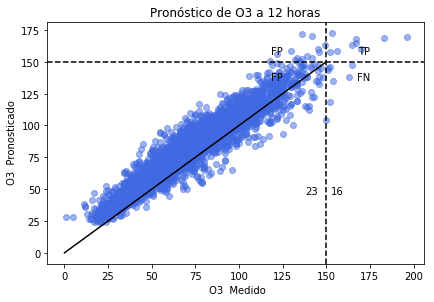

In [1433]:
plt.scatter(y_test,y_1,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')
plt.annotate(str(len(y_1[y_1>150])), (135,65), xytext = (145, 45 + 1), 
              horizontalalignment='right')
plt.annotate(str(y_test[y_test>150].count()), (155,65), xytext = (160, 45 + 1), 
              horizontalalignment='right')
plt.plot( [0,150],[0,150],color="k")
plt.tight_layout(1.3)
plt.xlabel(' O3  Medido')
plt.ylabel(' O3  Pronosticado')
plt.title('Pronóstico de O3 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=600)
plt.show()

In [1431]:
gbr.score(X_test, y_test)

0.7799102070360014

In [1432]:
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.05,verbose=1,random_state=123,loss="lad")#,n_estimators=1000)

In [1412]:
regr_fit = gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1          21.6685           48.49s
         2          20.8058           45.90s
         3          19.9826           45.07s
         4          19.2243           44.54s
         5          18.5166           44.22s
         6          17.8642           44.02s
         7          17.2376           43.87s
         8          16.6516           43.76s
         9          16.0931           43.70s
        10          15.5540           43.59s
        20          11.7540           42.22s
        30           9.6836           41.46s
        40           8.5342           40.65s
        50           7.8822           39.44s
        60           7.4748           37.64s
        70           7.2239           36.02s
        80           7.0088           35.38s
        90           6.8523           34.57s
       100           6.7308           33.49s
       200           6.1491           23.57s
       300           5.8946           15.01s
       40

In [1413]:
y_2 = gbr.predict(X_test)

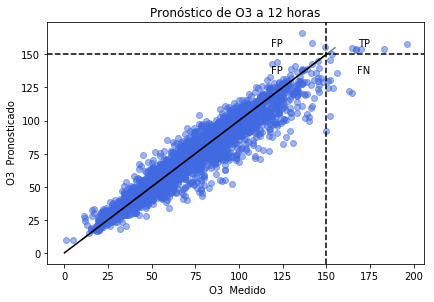

In [1415]:
#y_2 = pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(y_2)),columns=["O3_11_forecast"]);
#y_test_1 = pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(y_test)),columns=["O3_11_forecast"]);

plt.scatter(y_test,y_2,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.tight_layout(1.3)
plt.plot( [10,155],[10,155],color="k",alpha=0.5)
plt.xlabel(' O3  Medido')
plt.ylabel(' O3  Pronosticado')
plt.title('Pronóstico de O3 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=600)
plt.show()

In [1419]:
gbr.score(X_test, y_test)

0.896305653023233

## Random forest

In [428]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [ ]:
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [1416]:
regr = RandomForestRegressor(n_estimators=100)#max_depth=10,n_estimators=1000,n_jobs=1000,min_samples_split= 10,criterion= 'mse')#max_depth=10,n_estimators=10)
regr_fit = regr.fit(X_train, y_train)

In [1417]:
y_1 = regr_fit.predict(X_test)

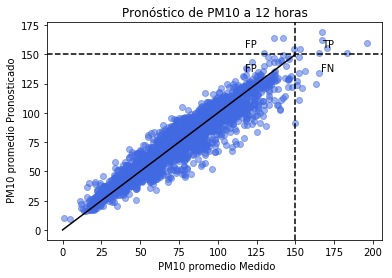

In [1420]:
plt.scatter(y_test, y_1,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.xlabel(' PM10 promedio Medido')
plt.ylabel(' PM10 promedio Pronosticado')
plt.title('Pronóstico de PM10 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=900)
plt.show()

In [1421]:
regr_fit.score(X_test, y_test)

0.8927854419567657

In [2098]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(regr_2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances;

In [ ]:
importances[importances.importance > .005].plot.bar(color="royalblue")
#plt.savefig('/Users/danielbustillos/Desktop/teemp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=900)


In [ ]:
preds = y_1.tolist()

In [ ]:
yi = y_test.tolist()

In [ ]:
y;

In [ ]:
# >>> plt.plot(yi,label='PM10  Medido',alpha=0.8,linewidth=2)
>>> plt.plot(preds ,label='PM10 Pronosticado',alpha=0.8,linewidth=2,color="brown")
>>> plt.plot(yi,label='PM10  Medido',alpha=0.8,linewidth=2)
>>> plt.xlabel("Enero 2019")
>>> plt.ylabel("PM10 promedio(microg/m3)")
plt.title('Comparación de Modelo')
>>> plt.xlim(0, 60)
plt.legend()
plt.savefig('/Users/danielbustillos/Desktop/Pm10.png',facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight" ,dpi=800)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_1))
print("RMSE: %f" % (rmse))

## Visualizaciones    <a class="anchor" id="viz-bullet"></a>

In [ ]:
data_hour_merge_24.columns

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "O3", data_hour_merge_24[(data_hour_merge_24.CO >0.1)&(data_hour_merge_24.O3 >0.1)]);
plt.savefig('/Users/danielbustillos/Desktop/pm10-03.png',facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight" ,dpi=500)

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("hora", "O3", data_hour_merge_24, kind='kde',color="g");
plt.savefig('/Users/danielbustillos/Desktop/uva.png',facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight" ,dpi=1000)

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("dia", "O3", data_hour_merge_24);
    plt.savefig('/Users/danielbustillos/Desktop/dia-o3.png', dpi=400,background="white")

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("PM10", "O3", data_hour_merge_24);
    plt.savefig('/Users/danielbustillos/Desktop/pm10-o3.png', dpi=400,background="white")

In [ ]:
g = sns.PairGrid(data_hour_merge_24, vars=['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:
g = sns.PairGrid(data_hour_merge_24, vars=['PM2.5', 'PMCO', 'SO2','TMP', 'WSP', 'O3'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:
data_hour_merge_24.columns

In [ ]:
g = sns.PairGrid(data_hour_merge_24, vars=['mes', 'hora',"dia",'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2','TMP', 'WSP', 'PM10',"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [ ]:
## Detalle

In [ ]:
g = sns.PairGrid(data_18, vars=['RH',
       'TMP', 'WSP', 'PM10'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# Calsificador

# Modelos de ML

## Clasificadores

In [813]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import rcParams
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2
rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

In [814]:
df = data_hour_merge_24

In [77]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=123)
df_train, df_valid = train_test_split(df_train, test_size=0.33, random_state=123)

In [78]:
df_train_0 = df_train.loc[df['class'] == 0]
df_train_1 = df_train.loc[df['class'] == 1]
df_train_0_x = df_train_0.drop(['class'], axis=1)
df_train_1_x = df_train_1.drop(['class'], axis=1)

In [79]:
df_valid_0 = df_valid.loc[df['class'] == 0]
df_valid_1 = df_valid.loc[df['class'] == 1]
df_valid_0_x = df_valid_0.drop(['class'], axis=1)
df_valid_1_x = df_valid_1.drop(['class'], axis=1)

In [80]:
df_test_0 = df_test.loc[df['class'] == 0]
df_test_1 = df_test.loc[df['class'] == 1]
df_test_0_x = df_test_0.drop(['class'], axis=1)
df_test_1_x = df_test_1.drop(['class'], axis=1)

Standardization

It is usually better to use a standardized data (transformed to Gaussian, mean 0 and variance 1) for autoencoders.

In [81]:
scaler = StandardScaler().fit(df_train_0_x)
df_train_0_x_rescaled = scaler.transform(df_train_0_x)
df_valid_0_x_rescaled = scaler.transform(df_valid_0_x)
df_valid_x_rescaled = scaler.transform(df_valid.drop(['class'], axis = 1))
df_test_0_x_rescaled = scaler.transform(df_test_0_x)
df_test_x_rescaled = scaler.transform(df_test.drop(['class'], axis = 1))

## Autoencoder Classifier
### Initialization

First, we will initialize the Autoencoder architecture. We are building a simple autoencoder. More complex architectures and other configurations should be explored.

In [104]:
nb_epoch = 100
batch_size = 128
input_dim = df_train_0_x_rescaled.shape[1] #num of predictor variables, 
encoding_dim = 50
hidden_dim = int(encoding_dim / 2)
learning_rate = 0.0000001
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

## Training

We will train the model and save it in a file. Saving a trained model is a good practice for saving time for future analysis.


autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')
cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)
tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)
history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_valid_0_x_rescaled, df_valid_0_x_rescaled),
                    verbose=1,
                    callbacks=[cp, tb]).history

## Classification

In the following, we show how we can use an Autoencoder reconstruction error for the rare-event classification.

As mentioned before, if the reconstruction error is high, we will classify it as a sheet-break. We will need to determine the threshold for this.

We will use the validation set to identify the threshold.

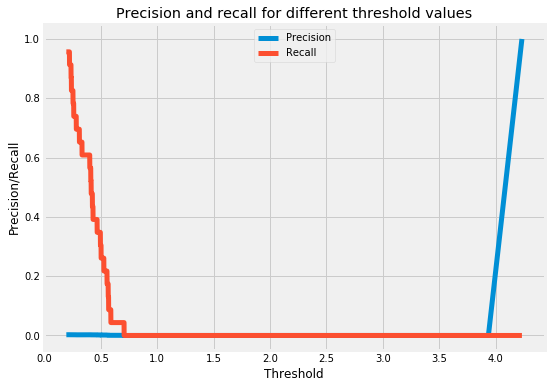

In [106]:
valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid['class']})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Now, we will perform classification on the test data.

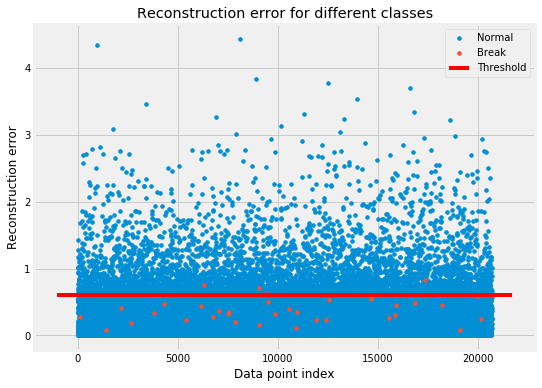

In [107]:
test_x_predictions = autoencoder.predict(df_test_x_rescaled)
mse = np.mean(np.power(df_test_x_rescaled - test_x_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_test['class']})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.6
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

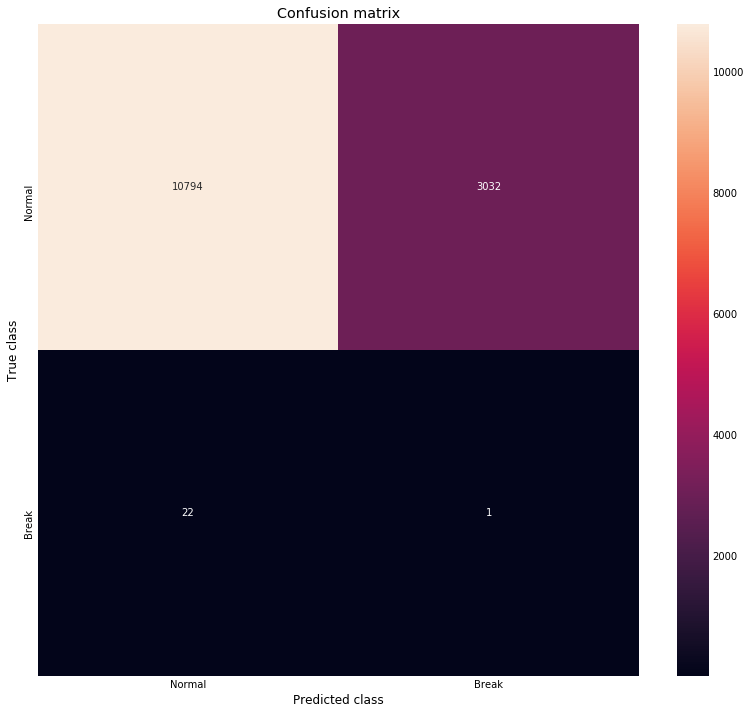

In [108]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [251]:
from sklearn import svm

In [271]:
dataset = data_hour_merge_24#.head(30000)

In [272]:
X = dataset.loc[:, dataset.columns != 'class']
y = dataset["class"]

In [273]:
X = dataset.loc[:, dataset.columns != 'class']
y = dataset["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [274]:
clf = svm.SVC(gamma=0.001)

In [275]:
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [276]:
slf_prediction = clf.predict(X_test)  

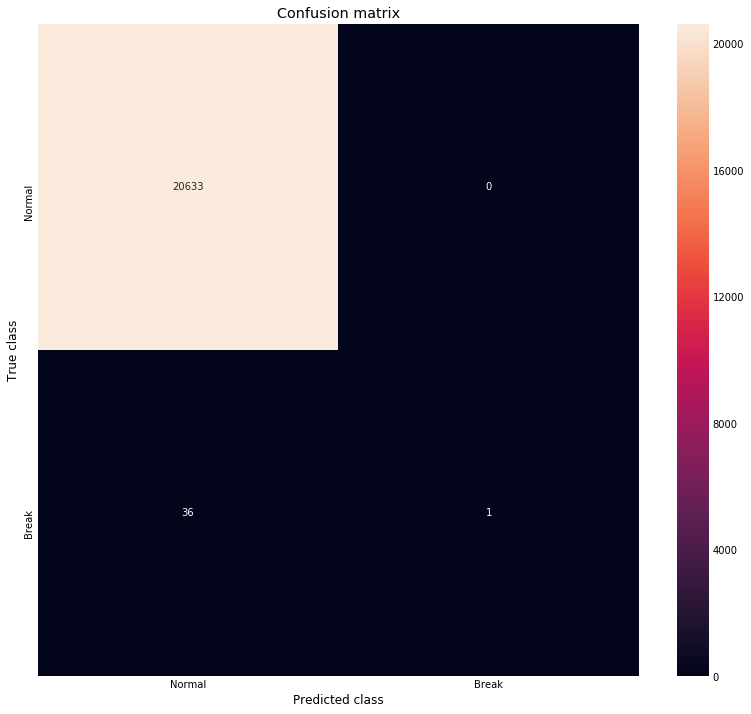

In [277]:
conf_matrix = confusion_matrix(y_test, slf_prediction)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [279]:
#RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train,y_train)
rfc_prediction = rfc_clf.predict(X_test)
print(rfc_prediction)

[0 0 0 ... 0 0 0]


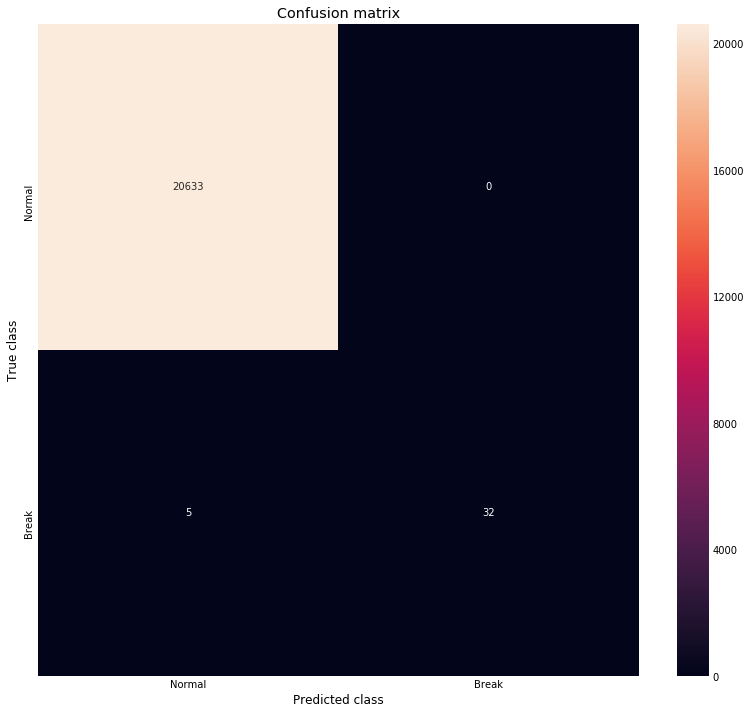

In [280]:
conf_matrix = confusion_matrix(y_test, rfc_prediction)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [324]:
from sklearn import tree
#The code for the classification is as follows

#DecisionTreeClassifier
dtc_clf = tree.DecisionTreeClassifier()
dtc_clf = dtc_clf.fit(X_train,y_train)
dtc_prediction = dtc_clf.predict(X_train)
print(dtc_prediction)

ValueError: Unknown label type: 'continuous'

In [325]:
conf_matrix = confusion_matrix(y_test, dtc_prediction)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [295]:
y_test[y_test>0].count()

37

In [298]:
import pickle

In [301]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(clf, '/home/paw/DanielBustillos/random_forest_class.pkl') 

['/home/paw/DanielBustillos/random_forest_class.pkl']

In [303]:
# Load the pickle file
clf_load = joblib.load('/home/paw/DanielBustillos/random_forest_class.pkl') 